In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.model_selection
import sklearn.preprocessing
import scipy.integrate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import itertools
from sklearn.model_selection import KFold
%matplotlib inline

In [57]:
url="https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/OJ.csv"
dataJuice=pd.read_csv(url)

In [58]:
y=dataJuice["Purchase"]
x=dataJuice.drop(["Purchase","Store7"],axis=1)
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.25)

# Logistic Regression:

(0, 1)

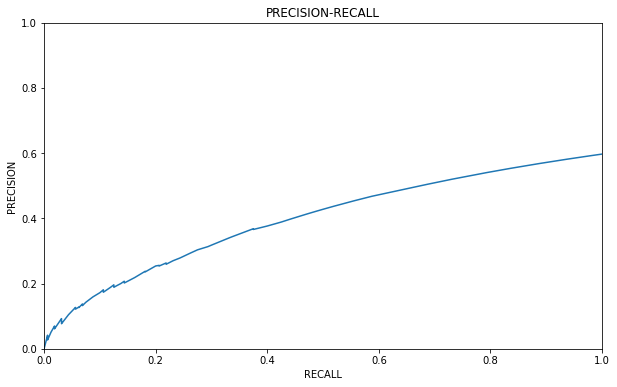

In [59]:
f = sklearn.linear_model.LogisticRegression(solver='lbfgs',max_iter=1000)


#  Fit with train
f.fit(X_train, Y_train)

# Predict with test
predict = f.predict(X_test)

# This is the probability for Default='Yes'
proba_yes = f.predict_proba(X_test)[:,1]

# loop over n_p different values for the threshold probabiity
n_p = 100
error_rate = np.zeros(n_p)
precision = np.zeros(n_p)
recall = np.zeros(n_p)
tp_rate = np.zeros(n_p)
fp_rate = np.zeros(n_p)
threshold = np.linspace(0,0.99, n_p)

for i in range(n_p):
    ii = proba_yes>threshold[i]
    predict[ii] = 'CH'
    predict[~ii] = 'MM'
    true_positive = (Y_test == 'CH') & (predict == 'CH') 
    false_positive = (Y_test == 'MM') & (predict == 'CH')
    false_negative = (Y_test == 'CH') & (predict == 'MM')
    true_negative = (Y_test == 'MM') & (predict == 'MM')
    n_tp = np.count_nonzero(true_positive)
    n_fp= np.count_nonzero(false_positive)
    n_fn = np.count_nonzero(false_negative)
    n_tn = np.count_nonzero(true_negative)
    if((n_tp+n_fp)>0): precision[i] = n_tp/(n_tp + n_fp)
    if((n_tp+n_fn)>0): recall[i] = n_tp/(n_tp + n_fn); tp_rate[i] = recall[i]  
    if((n_fp+n_tn)>0): fp_rate[i] = n_fp/(n_fp+n_tn)
    
    
plt.figure(figsize=(10,6))
plt.plot(recall, precision)
plt.xlabel('RECALL')
plt.ylabel('PRECISION')
plt.title('PRECISION-RECALL')
plt.xlim([0,1])
plt.ylim([0,1])

# LDA:

/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


(0, 1)

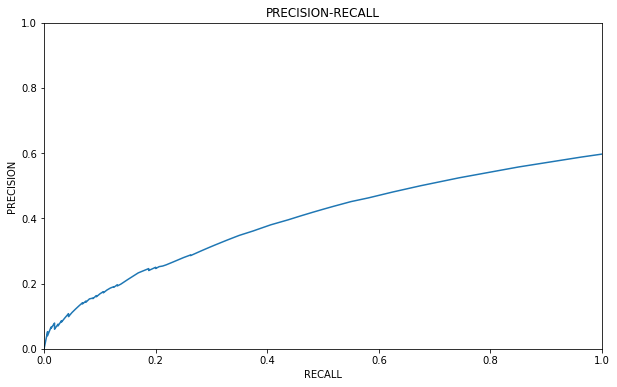

In [60]:
clf = LinearDiscriminantAnalysis()


#  Fit with train
clf.fit(X_train, Y_train)

# Predict with test
predict = clf.predict(X_test)

# This is the probability for Default='Yes'
proba_yes = clf.predict_proba(X_test)[:,1]

# loop over n_p different values for the threshold probabiity
n_p = 100
error_rate = np.zeros(n_p)
precision = np.zeros(n_p)
recall = np.zeros(n_p)
tp_rate = np.zeros(n_p)
fp_rate = np.zeros(n_p)
threshold = np.linspace(0,0.99, n_p)

for i in range(n_p):
    ii = proba_yes>threshold[i]
    predict[ii] = 'CH'
    predict[~ii] = 'MM'
    true_positive = (Y_test == 'CH') & (predict == 'CH') 
    false_positive = (Y_test == 'MM') & (predict == 'CH')
    false_negative = (Y_test == 'CH') & (predict == 'MM')
    true_negative = (Y_test == 'MM') & (predict == 'MM')
    n_tp = np.count_nonzero(true_positive)
    n_fp= np.count_nonzero(false_positive)
    n_fn = np.count_nonzero(false_negative)
    n_tn = np.count_nonzero(true_negative)
    if((n_tp+n_fp)>0): precision[i] = n_tp/(n_tp + n_fp)
    if((n_tp+n_fn)>0): recall[i] = n_tp/(n_tp + n_fn); tp_rate[i] = recall[i]  
    if((n_fp+n_tn)>0): fp_rate[i] = n_fp/(n_fp+n_tn)
    
    
plt.figure(figsize=(10,6))
plt.plot(recall, precision)
plt.xlabel('RECALL')
plt.ylabel('PRECISION')
plt.title('PRECISION-RECALL')
plt.xlim([0,1])
plt.ylim([0,1])

# Classification Tree:

In [61]:
kf = KFold(n_splits=3)
foldTrain=[]
foldTest=[]
foldValidation=[]
rang=[]
for i in range(15):
    foldTraini=[]
    foldTesti=[]
    foldValidationi=[]
    for train, test in kf.split(xtrain,ytrain):
        reg=tree.DecisionTreeClassifier(max_depth=i+1)
        reg=reg.fit(xtrain.iloc[train,:],ytrain.iloc[train])
        foldTraini.append(reg.score(xtrain.iloc[train,:],ytrain.iloc[train]))
        foldValidationi.append(reg.score(xtrain.iloc[test,:],ytrain.iloc[test]))
        foldTesti.append(reg.score(xtest,ytest))
    foldTrain.append(foldTraini)
    foldValidation.append(foldValidationi)
    foldTest.append(foldTesti)
    rang.append(i+1)

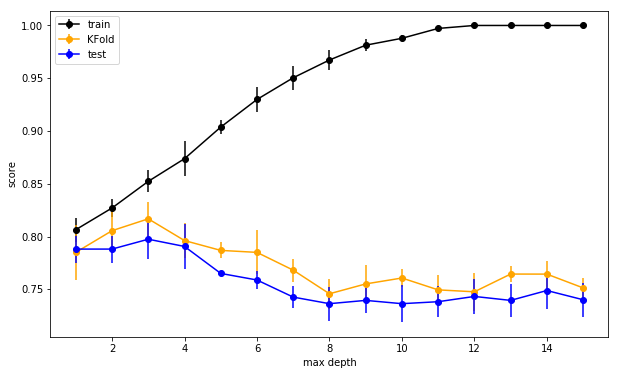

In [62]:
scoreTrain=np.mean(foldTrain,axis=1)
stdTrain=np.std(foldTrain,axis=1)
scoreValidation=np.mean(foldValidation,axis=1)
stdValidation=np.std(foldValidation,axis=1)
scoreTest=np.mean(foldTest,axis=1)
stdTest=np.std(foldTest,axis=1)

plt.figure(figsize=(10,6))
rang=np.arange(1,16)
plt.errorbar(rang, scoreTrain, c="k", marker="o",yerr=stdTrain,label="train")
plt.errorbar(rang, scoreValidation, c="orange",yerr=stdValidation, marker="o",label="KFold")
plt.errorbar(rang, scoreTest, c="b", marker="o",yerr=stdTest,label="test")
plt.xlabel("max depth")
plt.ylabel("score")
plt.legend()

Se nota que el score (parametro que determina la calidad del ajuste al modelo) en funcon de max depth es maximo para max depth = 3. Se usará este parámetro para comparar este tipo de ajuste con LDA y Logistic Regression.

(0, 1)

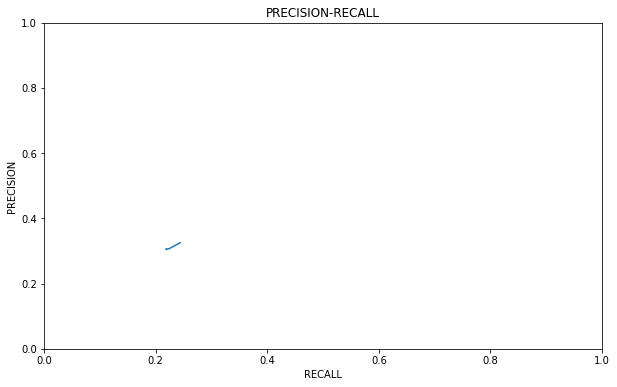

In [51]:
ftree=tree.DecisionTreeClassifier(max_depth=3)
ftree=reg.fit(xtrain,ytrain)


#  Fit with train
ftree.fit(X_train, Y_train)

# Predict with test
predict = ftree.predict(X_test)

# This is the probability for Default='Yes'
proba_yes = ftree.predict_proba(X_test)[:,1]

# loop over n_p different values for the threshold probabiity
n_p = 100
error_rate = np.zeros(n_p)
precision = np.zeros(n_p)
recall = np.zeros(n_p)
tp_rate = np.zeros(n_p)
fp_rate = np.zeros(n_p)
threshold = np.linspace(0,0.99, n_p)


for i in range(n_p):
    ii = proba_yes>threshold[i]
    predict[ii] = 'CH'
    predict[~ii] = 'MM'
    true_positive = (Y_test == 'CH') & (predict == 'CH') 
    false_positive = (Y_test == 'MM') & (predict == 'CH')
    false_negative = (Y_test == 'CH') & (predict == 'MM')
    true_negative = (Y_test == 'MM') & (predict == 'MM')
    n_tp = np.count_nonzero(true_positive)
    n_fp= np.count_nonzero(false_positive)
    n_fn = np.count_nonzero(false_negative)
    n_tn = np.count_nonzero(true_negative)
    if((n_tp+n_fp)>0): precision[i] = n_tp/(n_tp + n_fp)
    if((n_tp+n_fn)>0): recall[i] = n_tp/(n_tp + n_fn); tp_rate[i] = recall[i]  
    if((n_fp+n_tn)>0): fp_rate[i] = n_fp/(n_fp+n_tn)
    
    
plt.figure(figsize=(10,6))
plt.plot(recall, precision)
plt.xlabel('RECALL')
plt.ylabel('PRECISION')
plt.title('PRECISION-RECALL')
plt.xlim([0,1])
plt.ylim([0,1])